In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import adam_v2

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np



In [4]:
labels = ['OSTRICH', 'PEACOCK']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        print(path)
        for img in os.listdir(path):
            try:
          
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                print(img_arr)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
#Now we can easily fetch our train and validation data.
train = get_data('/content/drive/MyDrive/input/train')

val = get_data('/content/drive/MyDrive/input/test')
 

Streaming output truncated to the last 5000 lines.
  [117 135  77]]]
[[[ 41  56  87]
  [ 33  41  52]
  [ 56  49  21]
  ...
  [ 36  28   7]
  [ 37  25   9]
  [ 50  36  23]]

 [[ 68  88  89]
  [ 50  62  48]
  [ 77  76  32]
  ...
  [ 34  23   1]
  [ 36  21   2]
  [ 39  23   7]]

 [[ 83 113  53]
  [ 91 116  50]
  [107 120  41]
  ...
  [ 40  22   0]
  [ 50  32   8]
  [ 53  33   8]]

 ...

 [[ 74  67  15]
  [ 78  72  20]
  [ 59  53   3]
  ...
  [107 103  91]
  [ 40  34  18]
  [ 63  58  39]]

 [[ 88  83  27]
  [ 84  79  23]
  [ 75  70  14]
  ...
  [ 44  36  17]
  [ 44  33  11]
  [ 65  55  28]]

 [[ 97  92  34]
  [ 96  91  33]
  [ 65  60   2]
  ...
  [ 68  57  35]
  [ 78  66  40]
  [ 59  48  18]]]
[[[ 18  74  49]
  [ 17  71  47]
  [ 25  70  47]
  ...
  [ 33  83  72]
  [ 41 101  93]
  [  9  74  66]]

 [[ 18  71  45]
  [ 16  66  41]
  [ 16  62  36]
  ...
  [ 37  85  73]
  [ 32  88  77]
  [ 36  98  87]]

 [[ 19  63  36]
  [ 17  61  34]
  [ 15  59  32]
  ...
  [ 38  85  67]
  [ 51 102  87]
  [ 42 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


[[[155 168 212]
  [155 168 212]
  [155 168 212]
  ...
  [156 167 213]
  [159 165 213]
  [161 167 215]]

 [[155 168 212]
  [155 168 212]
  [155 168 212]
  ...
  [156 167 213]
  [160 166 214]
  [161 167 215]]

 [[156 169 213]
  [156 169 213]
  [156 169 213]
  ...
  [156 167 213]
  [160 166 214]
  [161 167 215]]

 ...

 [[225 194 174]
  [221 190 170]
  [210 179 159]
  ...
  [217 181 165]
  [213 177 163]
  [210 174 160]]

 [[223 192 174]
  [229 198 180]
  [230 199 179]
  ...
  [212 177 158]
  [212 175 159]
  [213 176 160]]

 [[222 191 173]
  [225 194 176]
  [225 194 174]
  ...
  [212 177 158]
  [212 175 159]
  [211 174 158]]]
[[[102 123  56]
  [102 124  59]
  [103 125  61]
  ...
  [109 133  55]
  [120 147  66]
  [ 93 120  39]]

 [[ 91 112  45]
  [100 121  56]
  [ 94 116  52]
  ...
  [113 138  57]
  [140 165  84]
  [113 141  57]]

 [[ 73  94  29]
  [ 97 118  53]
  [ 89 111  47]
  ...
  [118 143  60]
  [121 146  63]
  [140 165  81]]

 ...

 [[149 156 105]
  [166 173 121]
  [168 176 119]
  ..

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [9]:
from keras.optimizer_v2.adam import Adam
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [10]:
history = model.fit(x_train,y_train,epochs = 150 , validation_data = (x_val, y_val))


Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 22s 2s/step - loss: 0.6815 - accuracy: 0.5868 - val_loss: 0.6753 - val_accuracy: 0.7000
Epoch 2/150
10/10 [==============================] - 20s 2s/step - loss: 0.6778 - accuracy: 0.6151 - val_loss: 0.6726 - val_accuracy: 0.5000
Epoch 3/150
10/10 [==============================] - 20s 2s/step - loss: 0.6732 - accuracy: 0.6372 - val_loss: 0.6699 - val_accuracy: 0.5000
Epoch 4/150
10/10 [==============================] - 20s 2s/step - loss: 0.6724 - accuracy: 0.6246 - val_loss: 0.6660 - val_accuracy: 0.5000
Epoch 5/150
10/10 [==============================] - 21s 2s/step - loss: 0.6652 - accuracy: 0.6656 - val_loss: 0.6624 - val_accuracy: 0.5000
Epoch 6/150
10/10 [==============================] - 20s 2s/step - loss: 0.6607 - accuracy: 0.6404 - val_loss: 0.6563 - val_accuracy: 0.5000
Epoch 7/150
10/10 [==============================] - 20s 2s/step - loss: 0.6548 - accuracy: 0.7350 - val_loss: 0.6512 - val_accuracy: 0.5000
Epoch 8/150
10/10 [======

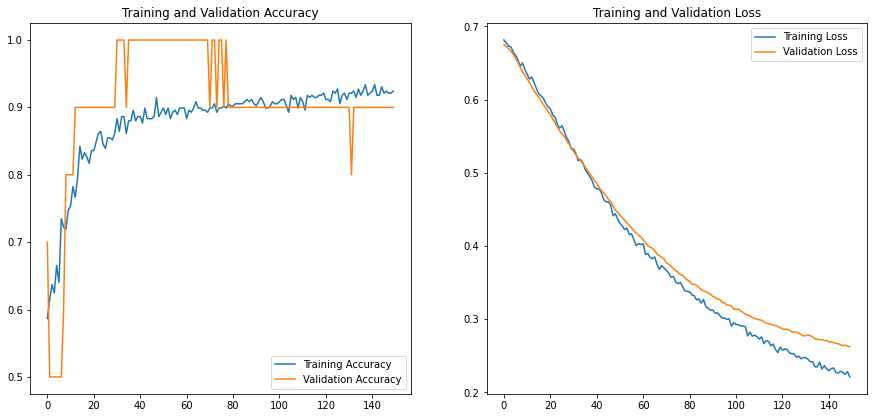

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
predictions = np.argmax(model.predict(x_val), axis=-1),
predictions = np.asarray(predictions)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Ostrich (Class 0)','Peacock (Class 1)']))


                   precision    recall  f1-score   support

Ostrich (Class 0)       1.00      0.80      0.89         5
Peacock (Class 1)       0.83      1.00      0.91         5

         accuracy                           0.90        10
        macro avg       0.92      0.90      0.90        10
     weighted avg       0.92      0.90      0.90        10



Task 1: Run the above code with given dataset.

Task 2: Run the code with different dataset




